In [1]:
import os
import argparse
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC

from classificationData import Datasets



In [6]:
datasets = Datasets('project_data/classificationProcessed')

convolutionBase = tf.keras.applications.ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape=(512, 512, 3), 
    pooling=None)

convolutionBase.trainable = True
set_trainable = False

Found 26297 images belonging to 9 classes.
Found 1042 images belonging to 9 classes.
Found 945 images belonging to 9 classes.


In [8]:
model = tf.keras.Sequential(
        [
            convolutionBase
        ]
    )
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(9, activation='softmax'))


model(tf.keras.Input(shape=(512, 512, 3)))
checkpoint_path = "./classificationWeights/"
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 16, 16, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67108992  
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1161      
Total params: 90,697,865
Trainable params: 90,644,745
Non-trainable params: 53,120
_________________________________________________________________
None


In [9]:
model.load_weights('classificationWeights/weights.e01-acc0.6482.h5')

In [23]:
import math
import numpy as np

number_of_examples = len(datasets.test_data.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 5.0)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(datasets.test_data[i][1]))

In [24]:
predics = model.predict(datasets.test_data)

In [26]:
print(predics.shape)

(1042, 9)


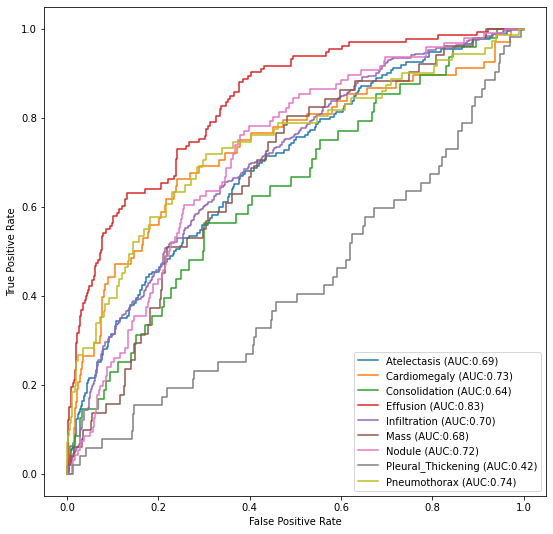

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

fig, c_ax = plt.subplots(1,1, figsize = (9, 9))

all_labels = list(datasets.test_data.class_indices.keys())

test_labels = np.array(test_labels)
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_labels[:,idx].astype(int), predics[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')